# Mapas das escolas do RS por taxa de distorção



In [3]:
# pip permite instalar novas bibliotecas
# ! permite a execução de comandos diretamente no juptir notebook
! pip install folium 


In [4]:
# importar bibliotecas
import pandas as pd
%matplotlib inline
import folium


In [5]:
#carregar o arquivo csv'
df = pd.read_csv('distorçao_2013_RS.csv',encoding='latin1',skiprows=1)

df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [8]:
# renomeando colunas
# NÃO FUNCIONA 2:12

df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)':'tx_distorção'},inplace=True)

df.head()


,Município,ibge,latitude,longitude,tx_distorção
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [9]:
#verificando do datafra
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorção    495 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 15.5+ KB


In [12]:
# convertendo tx para float
# trocar , por .
df['tx_distorção']= df['tx_distorção'].str.replace(',','.')

df.head()


,Município,ibge,latitude,longitude,tx_distorção
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorção    495 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 15.5+ KB


In [13]:
# fazendo a conversão para float (2.18:44comando desnecesário)
df['tx_distorção'] = df['tx_distorção'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorção    495 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 17.5+ KB


In [52]:
# 10 municipios com menor taxa
df.nsmallest(10,'tx_distorção')

,Município,ibge,latitude,longitude,tx_distorção
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


In [14]:
# 10 municipios com maior taxa
df.nlargest(10,'tx_distorção')

,Município,ibge,latitude,longitude,tx_distorção
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


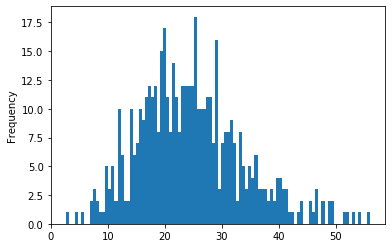

In [15]:
# plotando histograma da tx
df['tx_distorção'].plot.hist(bins=100)

In [16]:
# MUNICIPIOS COM TX MENOR IGUAL A 10
df[df['tx_distorção']<=10].count()


Município       17
ibge            17
latitude        17
longitude       17
tx_distorção    17
dtype: int64

In [17]:
# MUNICIPIOS COM TX MAIOR IGUAL A 45
df[df['tx_distorção']>=45].count()


Município       17
ibge            17
latitude        17
longitude       17
tx_distorção    17
dtype: int64

In [48]:
# Aprendendo como funciona o folium



In [21]:
rs = folium.Map(
    location=[-30.5,-52],
    zoom_start=6)

rs


In [26]:
# bug plotando green e red sem pedir

for indice,municipio in df[df['tx_distorção']>=45].iterrows():
        folium.Marker(
            location=[municipio['latitude'],municipio['longitude']],
            popup=municipio['Município'],
            icon=folium.map.Icon(color='red')
        ).add_to(rs)
                            
rs


In [29]:
#Qual é a tx de distorção de PA

df[df['Município'] == 'Porto Alegre']['tx_distorção']

325    32.3
Name: tx_distorção, dtype: float64